In [12]:
# -.-|m { input: false }

# Optional: darken plots
import matplotlib.pyplot as plt
plt.style.use('dark_background')  # available backgrounds: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

# Optional: darken code cells
!pip install jupyterthemes  
!jt -t chesterish  # available themes: https://chazf.medium.com/jupyter-dark-mode-themes-b242fb459254

# Generating beautiful HTML of notebook
!pip install nbconvert pretty-jupyter
!jupyter nbconvert --to html --template pj demo.ipynb

[NbConvertApp] Converting notebook demo.ipynb to html
[NbConvertApp] Writing 5991807 bytes to demo.html


Complete notebook available at: https://github.com/ai4up/ufo-prediction/blob/main/demo/demo.ipynb

## Motivation

Building attributes such as building height, type, and construction year are not available for all buildings in EUBUCCO. However, for many prospective use cases of the dataset, such as energy modeling, the building attributes are of high importance. This notebook shows how the available building footprints can be used to estimate missing building attributes with supervised machine learning. For more details on the conceptualization and feature engineering see:

[Milojevic-Dupont, Nikola, et al. "Learning from urban form to predict building heights." Plos one 15.12 (2020): e0242010.](https://doi.org/10.1371/journal.pone.0242010)

In [ ]:
# -.-|m { input: false }

!pip install -r ../requirements.txt

In [4]:
# -.-|m { input: false }

# standard libs
import os
import sys
import logging

# project lib
PROJECT_SRC_PATH = os.path.join(os.path.abspath(''), '..', 'src')
sys.path.append(PROJECT_SRC_PATH)

import visualizations
from prediction_age import AgePredictor, AgeClassifier, AgePredictorComparison
import preprocessing as pp

# external libs
import numpy as np
import pandas as pd
import geopandas as gpd
from xgboost import XGBRegressor, XGBClassifier

/usr/local/Caskroom/miniconda/base/envs/test-ufo-prediction/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [5]:
# -.-|m { input: false }

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s', level=logging.INFO)

## Data

Demo sample of ~20k buildings for Spain, ~50k for France, and 170k for the Netherlands. All 117 urban form features, lat lon, as well as some auxiliary attributes like city name, neighborhood, building type, etc. are included.

The demo samples are stored using Git Large File Storage (LFS). To download them explicitly use:

In [ ]:
!git clone git@github.com:ai4up/ufo-prediction.git
!git lfs pull

In [6]:
DATA_DIR = '.'

path_data_NLD = os.path.join(DATA_DIR, 'df-NLD-exp.pkl')
path_data_FRA = os.path.join(DATA_DIR, 'df-FRA-exp.pkl')
path_data_ESP = os.path.join(DATA_DIR, 'df-ESP-exp.pkl')

df = pd.read_pickle(path_data_NLD)

## Prediction

In [7]:
xgb_model_params = {'tree_method': 'hist'}
xgb_hyperparams = {
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 500,
    'colsample_bytree': 0.5,
    'subsample': 1.0,
}

### Regression

2023-03-24 15:35:43,328 | INFO : Dataset length: 176319
2023-03-24 15:35:43,334 | INFO : Dataset allocated memory: 184 MB
2023-03-24 15:35:43,512 | INFO : No abort signal received. Continuing... To abort please create /Users/fnachtigall/workspace/ufo-prediction/metadata/local-807e8cef.abort.
2023-03-24 15:35:43,516 | INFO : Dataset standard deviation: 28.072581085899984
2023-03-24 15:35:43,517 | INFO : Dataset mean age: 1974.2587129010487
2023-03-24 15:35:43,517 | INFO : Training dataset length: 141055
2023-03-24 15:35:43,518 | INFO : Test dataset length: 35264
2023-03-24 15:35:44,148 | INFO : Test dataset standard deviation after preprocessing: 25.07194896229578
2023-03-24 15:35:44,149 | INFO : Test dataset mean age after preprocessing: 1975.4969008264463
2023-03-24 15:35:44,150 | INFO : Training dataset length after preprocessing: 139362
2023-03-24 15:35:44,150 | INFO : Test dataset length after preprocessing: 34848
pandas.Int64Index is deprecated and will be removed from pandas in a

MAE: 10.73 y
RMSE: 16.85 y
R2: 0.5483
R2: nan
MAPE: nan


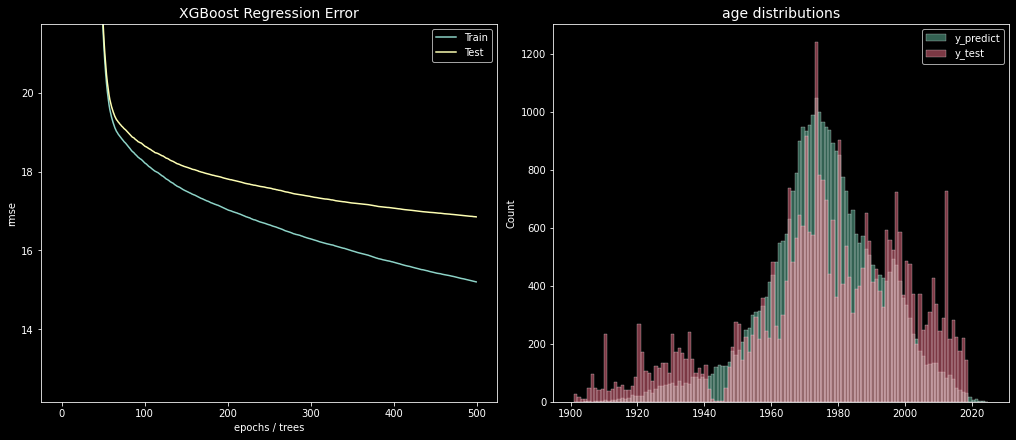

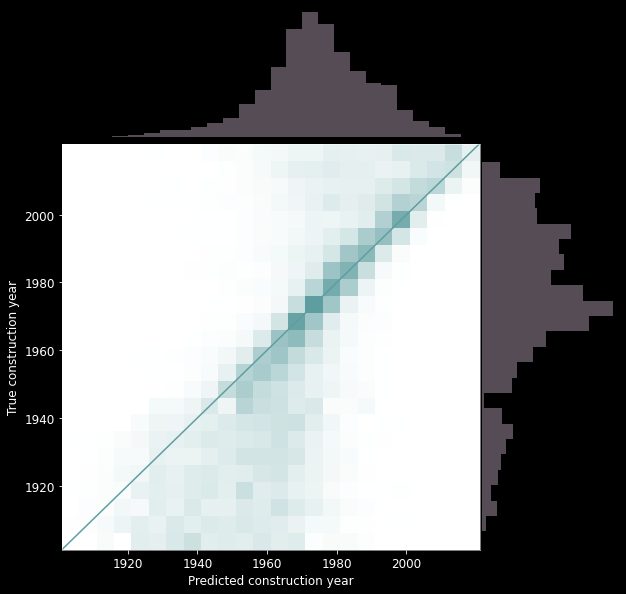

In [8]:
predictor = AgePredictor(
    model=XGBRegressor(**xgb_model_params),
    df=df,
    test_training_split=pp.split_80_20,
    # cross_validation_split=pp.cross_validation,
    early_stopping=True,
    hyperparameters=xgb_hyperparams,
    preprocessing_stages=[pp.remove_outliers]
)

predictor.evaluate()


### Classification

2023-03-24 15:35:59,715 | INFO : Generated bins: [1900, 1965, 1975, 1992, 2006, 2015, 2022]
2023-03-24 15:35:59,716 | INFO : Generated bins with the following labels: ['1900-1964', '1965-1974', '1975-1991', '1992-2005', '2006-2014', '2015-2021']
2023-03-24 15:35:59,909 | INFO : Dataset length: 176319
2023-03-24 15:35:59,915 | INFO : Dataset allocated memory: 184 MB
2023-03-24 15:36:00,085 | INFO : No abort signal received. Continuing... To abort please create /Users/fnachtigall/workspace/ufo-prediction/metadata/local-73deca36.abort.
2023-03-24 15:36:00,086 | INFO : Training dataset length: 141055
2023-03-24 15:36:00,087 | INFO : Test dataset length: 35264
2023-03-24 15:36:00,090 | INFO : Test cities: ['Apeldoorn' 'Groesbeek' 'Roggel en Neer' 'Dronten' 'Rijnwaarden'
 'Jacobswoude' 'IJsselstein' 'Dinxperlo' 'Kapelle' 'Renkum']
2023-03-24 15:36:00,463 | INFO : age attribute has been categorized (lowest age included: 1900; highest age included: 2021).
2023-03-24 15:36:00,621 | INFO : age a

Classification report:
               precision    recall  f1-score  support
1900-1964      0.751537  0.842825  0.794567     8850
1965-1974      0.875129  0.834151  0.854149     7133
1975-1991      0.904658  0.799159  0.848642     8798
1992-2005      0.852081  0.774682  0.811540     6209
2006-2014      0.595462  0.695315  0.641526     3095
2015-2021      0.496798  0.711664  0.585129      763
accuracy       0.801911  0.801911  0.801911        0
macro avg      0.745944  0.776299  0.755926    34848
weighted avg   0.813968  0.801911  0.805261    34848
Cohen’s kappa: 0.7501
Matthews correlation coefficient (MCC): 0.7513


FixedFormatter should only be used together with FixedLocator


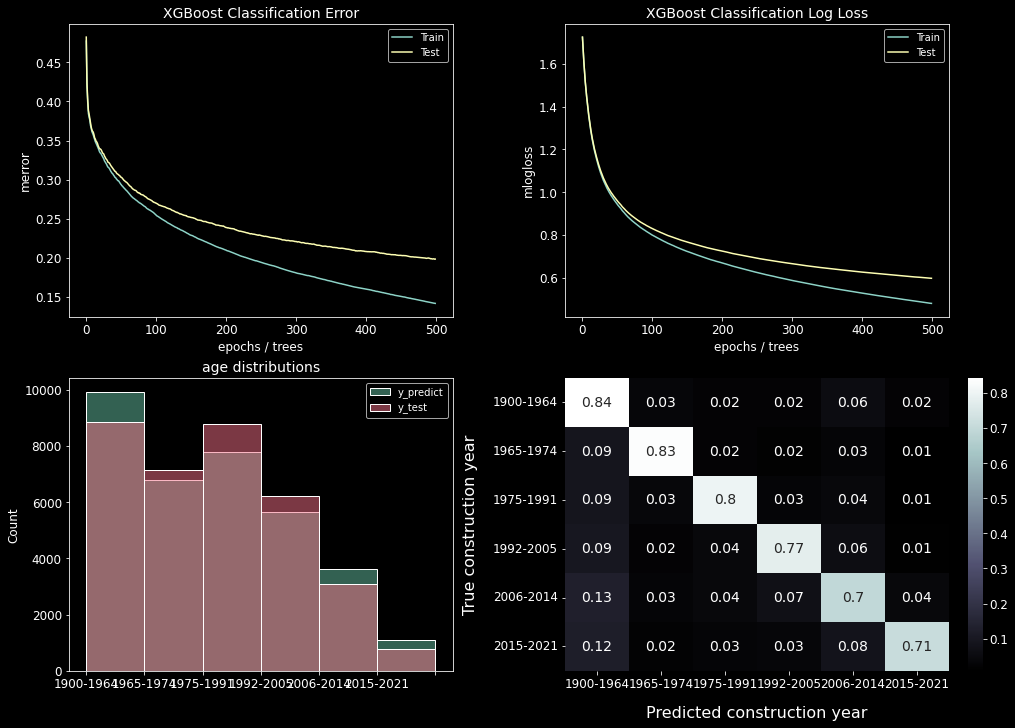

In [9]:
tabula_nl_bins = [1900, 1965, 1975, 1992, 2006, 2015, 2022]
equally_sized_bins = (1900, 2020, 10)

classifier = AgeClassifier(
    model=XGBClassifier(**xgb_model_params),
    df=df,
    test_training_split=pp.split_80_20,
    # cross_validation_split=pp.cross_validation,
    preprocessing_stages=[pp.remove_outliers],
    hyperparameters=xgb_hyperparams,
    mitigate_class_imbalance=True,
    # bin_config=equally_sized_bins,
    bins=tabula_nl_bins,
)
classifier.evaluate()

### Country and generalization comparison

The `AgePredictorComparison` faciliates comparisons between differently configured training runs, for example to compare the prediction performance between countries, cross-validation strategies, oversampling strategies or any other preprocessing steps.

In [10]:
comparison_config = {
    'Spain': {'df': path_data_ESP},
    'France': {'df': path_data_FRA},
    'Netherlands': {'df': path_data_NLD},
}

grid_comparison_config = {
    'random-cv': {'cross_validation_split': pp.cross_validation},
    'neighborhood-cv': {'cross_validation_split': pp.neighborhood_cross_validation},
    'city-cv': {'cross_validation_split': pp.city_cross_validation},
}

comparison = AgePredictorComparison(
    exp_name='demo',
    model=XGBRegressor(**xgb_model_params),
    df=None,
    frac=0.5,
    cross_validation_split=None,
    preprocessing_stages=[pp.remove_outliers],
    hyperparameters=xgb_hyperparams,
    compare_feature_importance=False,
    compare_classification_error=False,
    include_baseline=False,
    save_results=False,
    garbage_collect_after_training=True,
    comparison_config=comparison_config,
    grid_comparison_config=grid_comparison_config,
)

results = comparison.evaluate()

2023-03-24 15:36:54,472 | INFO : Starting experiment Spain_random-cv...
2023-03-24 15:36:55,528 | INFO : Dataset length: 974
2023-03-24 15:36:55,532 | INFO : Dataset allocated memory: 1 MB
2023-03-24 15:36:55,535 | INFO : No abort signal received. Continuing... To abort please create /Users/fnachtigall/workspace/ufo-prediction/metadata/local-82dbc84d.abort.
2023-03-24 15:36:55,536 | INFO : Dataset standard deviation: 45.78138305502198
2023-03-24 15:36:55,536 | INFO : Dataset mean age: 1950.3613963039015
2023-03-24 15:36:55,537 | INFO : Training dataset length: 779
2023-03-24 15:36:55,538 | INFO : Test dataset length: 195
2023-03-24 15:36:55,554 | INFO : Test dataset standard deviation after preprocessing: 34.49407581359104
2023-03-24 15:36:55,555 | INFO : Test dataset mean age after preprocessing: 1958.8352272727273
2023-03-24 15:36:55,556 | INFO : Training dataset length after preprocessing: 710
2023-03-24 15:36:55,556 | INFO : Test dataset length after preprocessing: 176
pandas.Int64

In [11]:
results

,name,R2,R2_std,MAE,MAE_std,RMSE,RMSE_std,within_5_years,within_10_years,within_20_years,R2_seed_0
8,Netherlands_city-cv,0.135401,0.0,18.030643,0.0,23.598668,0.0,0.221385,0.392977,0.638903,0.135401
7,France_city-cv,0.187767,0.0,18.645831,0.0,23.772030,0.0,0.176875,0.345911,0.615315,0.187767
6,Spain_city-cv,0.197072,0.0,23.840955,0.0,29.563272,0.0,0.126411,0.247178,0.494357,0.197072
3,Spain_neighborhood-cv,0.198503,0.0,23.779078,0.0,29.536916,0.0,0.129797,0.247178,0.506772,0.198503
5,Netherlands_neighborhood-cv,0.304538,0.0,15.884060,0.0,21.164937,0.0,0.241489,0.444702,0.699700,0.304538
4,France_neighborhood-cv,0.330228,0.0,16.306574,0.0,21.586864,0.0,0.211348,0.408337,0.705209,0.330228
0,Spain_random-cv,0.363164,0.0,20.108252,0.0,26.328608,0.0,0.180587,0.355530,0.592551,0.363164
1,France_random-cv,0.511105,0.0,12.372172,0.0,18.443089,0.0,0.369564,0.593466,0.806340,0.511105
2,Netherlands_random-cv,0.575725,0.0,10.203823,0.0,16.531180,0.0,0.525335,0.695626,0.827052,0.575725
